<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-luiscruzn/blob/main/Actividad_Semana6_A01002111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y analítica de datos**

##**Actividad Semanal -- 6 Visualización**

###**Profra:** Dra. María de la Paz Rico Fernández.

###**Alumno:** Luis Salvador Cruz Nájera

###**Matrícula:** A01002111

###**Fecha:** 31 de octubre de 2022

## **Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

#**Instrucciones**

##**Sigue las instrucciones y desarrolla en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.**##

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##**1).- Descarga los datos y carga el dataset en tu libreta.**##

In [240]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


##**2).- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**##

In [241]:
df = df.rename(columns = {'X1':'monto_credito',
                          'X2':'genero',
                          'X3':'nivel_educativo',
                          'X4':'estado_civil',
                          'X5':'edad',
                          'X6':'pago_sept_2005',
                          'X7':'pago_agosto_2005',
                          'X8':'pago_julio_2005',
                          'X9':'pago_junio_2005',
                          'X10':'pago_mayo_2005',
                          'X11':'pago_abril_2005',
                          'X12':'amortizacion_sept_2005',
                          'X13':'amortizacion_agosto_2005',
                          'X14':'amortizacion_julio_2005',
                          'X15':'amortizacion_junio_2005',
                          'X16':'amortizacion_mayo_2005',
                          'X17':'amortizacion_abril_2005',
                          'X18':'pagoprev_sept_2005',
                          'X19':'pagoprev_agosto_2005',
                          'X20':'pagoprev_julio_2005',
                          'X21':'pagoprev_junio_2005',
                          'X22':'pagoprev_mayo_2005',
                          'X23':'pagoprev_abril_2005'}, inplace = False)

In [242]:
df.shape

(30000, 25)

In [243]:
df.columns

Index(['ID', 'monto_credito', 'genero', 'nivel_educativo', 'estado_civil',
       'edad', 'pago_sept_2005', 'pago_agosto_2005', 'pago_julio_2005',
       'pago_junio_2005', 'pago_mayo_2005', 'pago_abril_2005',
       'amortizacion_sept_2005', 'amortizacion_agosto_2005',
       'amortizacion_julio_2005', 'amortizacion_junio_2005',
       'amortizacion_mayo_2005', 'amortizacion_abril_2005',
       'pagoprev_sept_2005', 'pagoprev_agosto_2005', 'pagoprev_julio_2005',
       'pagoprev_junio_2005', 'pagoprev_mayo_2005', 'pagoprev_abril_2005',
       'Y'],
      dtype='object')

In [244]:
df.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [245]:
df.dtypes

ID                            int64
monto_credito                 int64
genero                      float64
nivel_educativo             float64
estado_civil                float64
edad                        float64
pago_sept_2005              float64
pago_agosto_2005            float64
pago_julio_2005             float64
pago_junio_2005             float64
pago_mayo_2005              float64
pago_abril_2005             float64
amortizacion_sept_2005      float64
amortizacion_agosto_2005    float64
amortizacion_julio_2005     float64
amortizacion_junio_2005     float64
amortizacion_mayo_2005      float64
amortizacion_abril_2005     float64
pagoprev_sept_2005          float64
pagoprev_agosto_2005        float64
pagoprev_julio_2005         float64
pagoprev_junio_2005         float64
pagoprev_mayo_2005          float64
pagoprev_abril_2005         float64
Y                           float64
dtype: object

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        30000 non-null  int64  
 1   monto_credito             30000 non-null  int64  
 2   genero                    29999 non-null  float64
 3   nivel_educativo           29998 non-null  float64
 4   estado_civil              29998 non-null  float64
 5   edad                      29995 non-null  float64
 6   pago_sept_2005            29997 non-null  float64
 7   pago_agosto_2005          29995 non-null  float64
 8   pago_julio_2005           29993 non-null  float64
 9   pago_junio_2005           29991 non-null  float64
 10  pago_mayo_2005            29984 non-null  float64
 11  pago_abril_2005           29986 non-null  float64
 12  amortizacion_sept_2005    29989 non-null  float64
 13  amortizacion_agosto_2005  29989 non-null  float64
 14  amorti

In [247]:
df.isna()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##**3).- Limpia los datos eliminando los registros nulos o rellena con la media de la columna**##

In [248]:
df.dropna(inplace = True)

[]

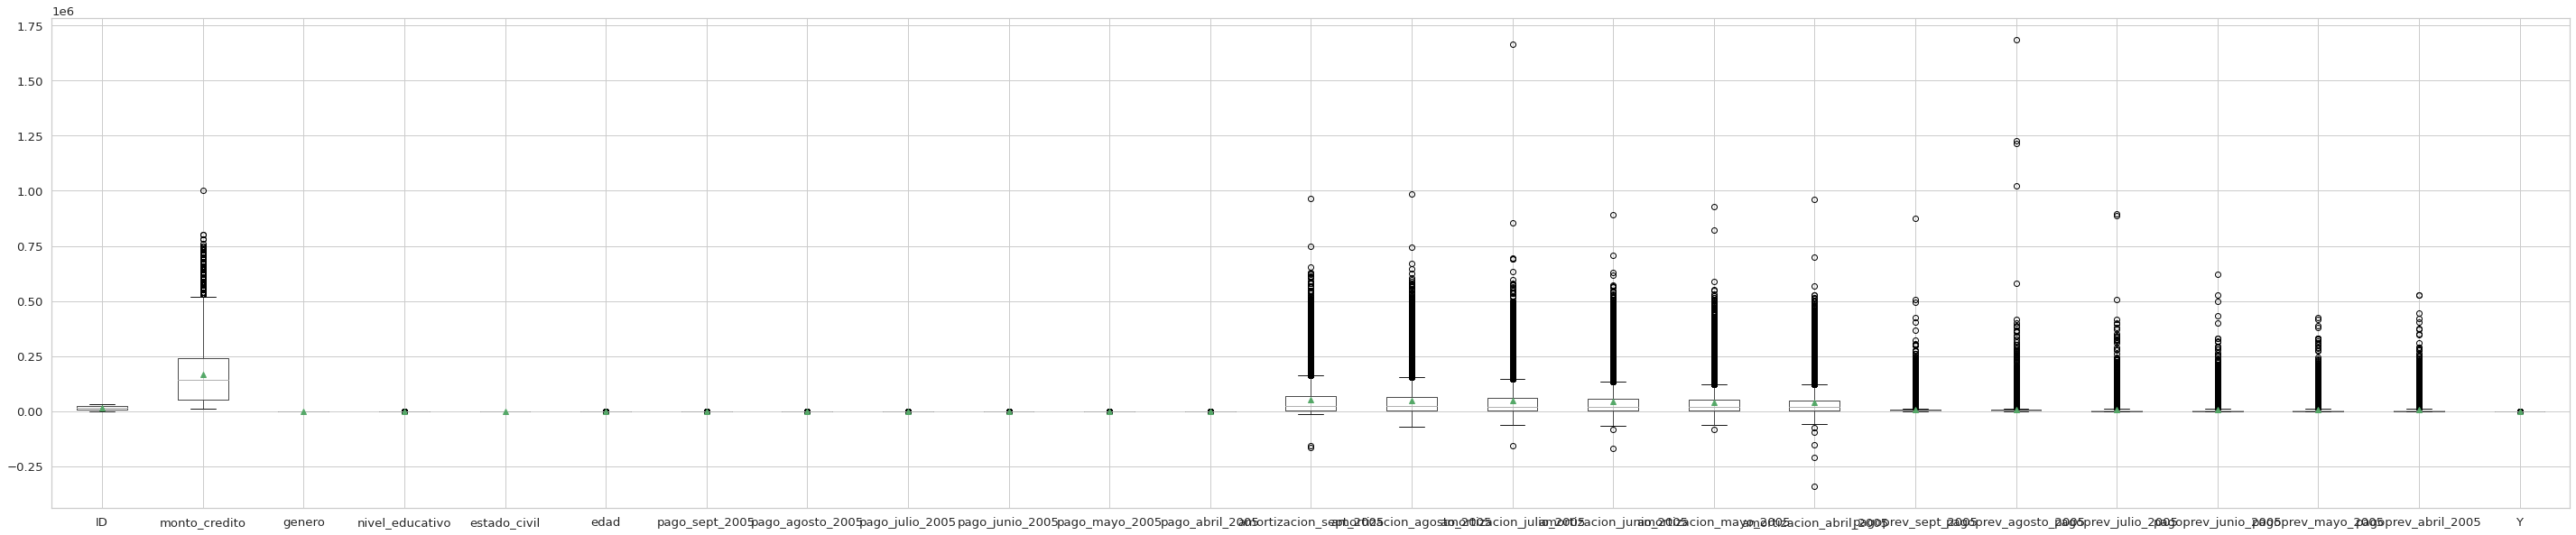

In [249]:
df_cols = df.columns.to_list()
boxplot = df.boxplot(figsize=(50,10), column=df_cols, labels=df_cols, showmeans = True)
boxplot.plot()

##**4).- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**###

In [250]:
df.describe(include = 'all')

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


###Las medidas de tendencia central para datos no agrupados son un conjunto de indicadores estadísticos que van a mostrar hacia qué valores se agrupan los datos numéricos, es decir, son medidas estadísticas que buscan resumir en un solo valor un conjunto de valores. Son comunes para poder identificar el centro de los conjuntos de datos, que vienen a ser la media, mediana y moda. cada una de ellas son ubicadas alrededor del punto donde los datos se aglomeran.###

####**La media o media aritmética**####
Esta es la primera de las medidas de tendencia central para datos no agrupados de la que hablaremos. Está determinada por el valor en promedio de una serie de conjunto de datos numéricos. Con esta medida, los cálculos se realizan a través de la sumatoria de todos los valores que se encuentren divididos, es el punto medio entre el valor máximo y valor mínimo de las cantidades existentes.

####**La media**#### 
Es el centro de toda la distribución, ya que en esta son representados los valores observados; por ejemplo, si existe un grupo de personas que tienen una estatura media de 1.60 metros, pues esta cantidad representa la estatura promedio de todos, a pesar de que no es la estatura de ninguna de las personas en forma particular. 

####**La mediana o mediana aritmética**####
Esta es una de las medidas de tendencia central para datos no agrupados también conocida como promedio aritmético: esta es el valor encontrado en el centro del conjunto de los datos luego de haber sido ordenados.

####**Moda**####
Es la tercera de las medidas de tendencia central para datos no agrupados. Esta medida sirve para identificar cuando un dato aparece continuamente, como también durante un periodo de tiempo determinado. Es en sí el dato que más aparece en un grupo, también pudiendo existir dos modas, conociéndose así como bimodal o, cuando hay más de dos modas recibe la denominación de multimodal, que es cuando el máximo número de repeticiones se da para tres o más números.  

#########################################################################

###Las Medidas de Dispersión nos indican qué tanto están dispersos o qué tanto abarcan en amplitud los datos de un conjunto. Cuando se tiene una muestra de datos obtenida de una población cualquiera, es importante determinar sus medidas de tendencia central, así como también es básico el determinar qué tan dispersos están los datos en la muestra, por lo que se hace necesario determinar su Rango, la Varianza y la Desviación Estándar, ya que una excesiva variabilidad o dispersión en los datos indica la inestabilidad del proceso en análisis en la mayoría de los casos.###

####**Varianza**#### 
Es representada como S cuadrada, es el promedio de las diferencias elevadas al cuadrado entre cada valor que se tiene en la muestra y la media aritmética, de los datos y se determina con la siguiente fórmula:####

####**La Desviación estándar**#### 
Corresponde a la raíz cuadrada de la varianza:####

##**5).-Realiza el conteo de las variables categóricas**##

In [251]:
print(df["edad"].value_counts())
print(df["genero"].value_counts())
print(df["nivel_educativo"].value_counts())

29.0    1601
27.0    1475
28.0    1408
30.0    1393
26.0    1255
31.0    1216
25.0    1184
34.0    1161
32.0    1156
33.0    1145
24.0    1123
35.0    1113
36.0    1108
37.0    1040
39.0     954
38.0     943
23.0     931
40.0     868
41.0     820
42.0     794
44.0     700
43.0     669
45.0     617
46.0     569
22.0     559
47.0     498
48.0     466
49.0     450
50.0     411
51.0     339
53.0     325
52.0     304
54.0     246
55.0     208
56.0     177
58.0     122
57.0     122
59.0      83
60.0      67
21.0      67
61.0      56
62.0      44
64.0      31
63.0      31
66.0      25
65.0      24
67.0      16
69.0      15
70.0      10
68.0       5
73.0       4
72.0       3
71.0       3
75.0       2
79.0       1
74.0       1
Name: edad, dtype: int64
2.0    18095
1.0    11863
Name: genero, dtype: int64
2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: nivel_educativo, dtype: int64


##**6).-Escala los datos, si consideras necesario**##

In [252]:
df.drop(columns={"ID", "genero", "nivel_educativo", "estado_civil", "pago_sept_2005",  "pago_agosto_2005", "pago_julio_2005", "pago_junio_2005", "pago_mayo_2005", "pago_abril_2005", "Y"}, inplace = True)
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_transformed.head()

,monto_credito,edad,amortizacion_sept_2005,amortizacion_agosto_2005,amortizacion_julio_2005,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


[]

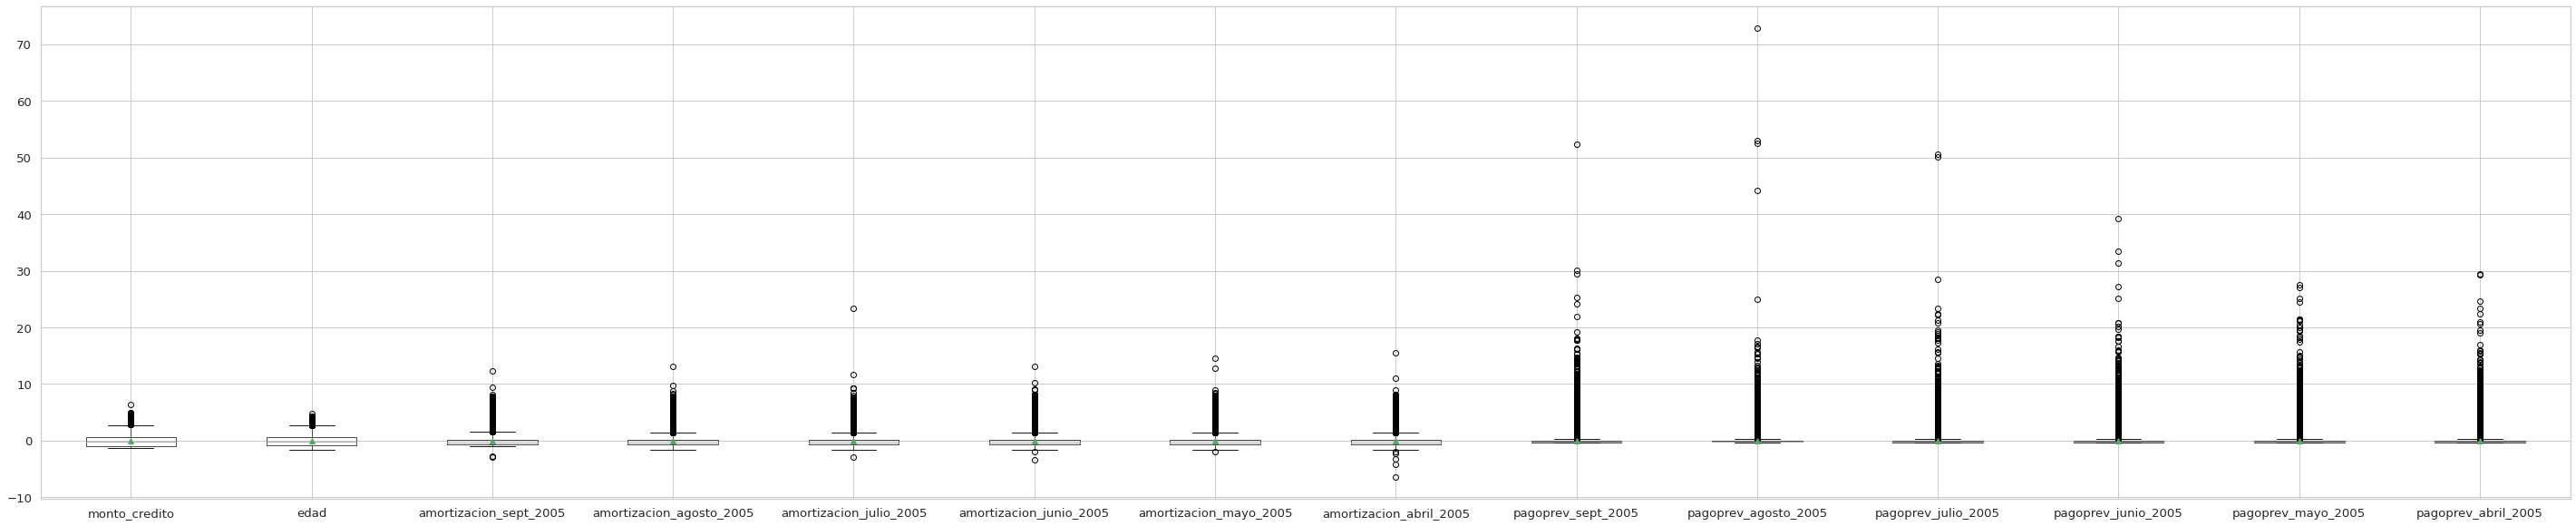

In [253]:
df_cols = df_transformed.columns.to_list()
boxplot = df_transformed.boxplot(figsize=(50,10), column=df_cols, labels=df_cols, showmeans = True)
boxplot.plot()

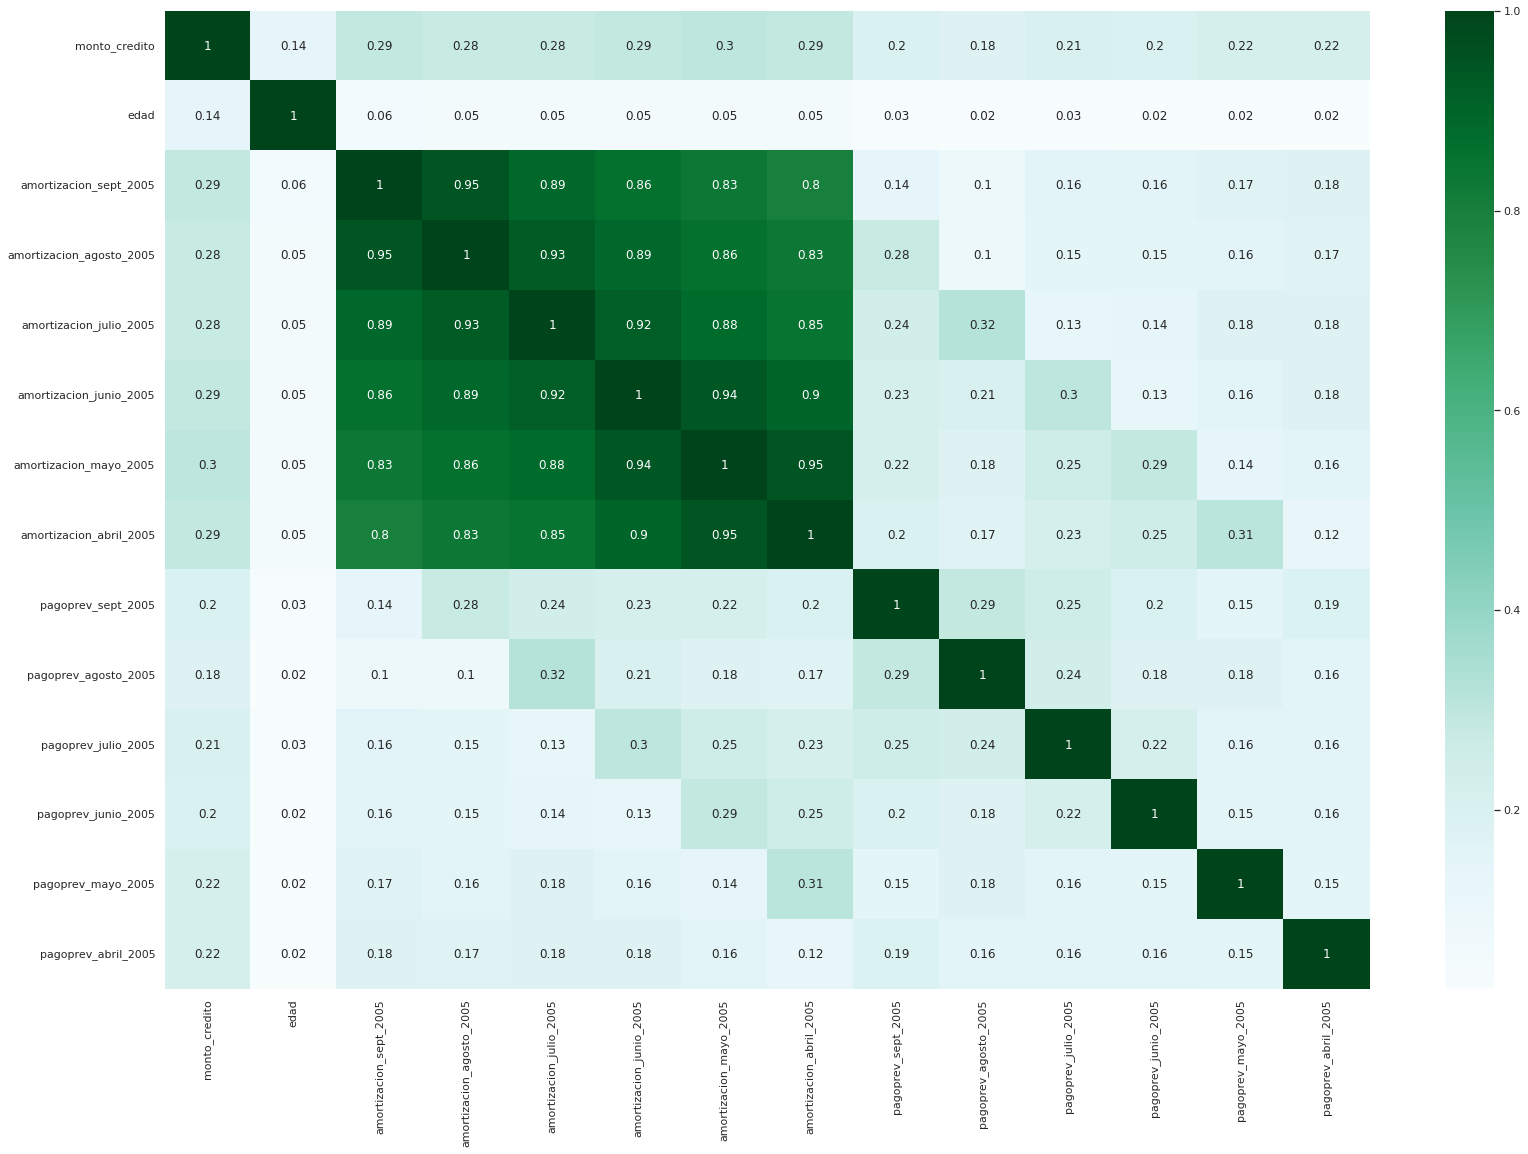

In [254]:
sns.set(rc={'figure.figsize':(27,18)}) 
#print(df.corr())
sns.heatmap(df_transformed.corr().round(2), annot=True, cmap="BuGn") 
plt.show()

##**7).- Reduce las dimensiones con PCA, si consideras necesario.**##
###7.1).- Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%###
###7.2).-Indica la importancia de las variables en cada componente###

In [255]:
pca = PCA(n_components = 0.70)
pca.fit(df_transformed)
pcaSummary = pd.DataFrame({'Standard deviation': np.round(np.sqrt(pca.explained_variance_), 2),
                          'Proportion of variance': np.round(pca.explained_variance_ratio_ * 100, 2),
                          'Cumulative proportion': np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2) 
                          })

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary

,PC1,PC2,PC3,PC4,PC5
Standard deviation,2.43,1.31,1.02,0.96,0.94
Proportion of variance,42.28,12.26,7.46,6.61,6.31
Cumulative proportion,42.28,54.53,62.00,68.61,74.92


In [256]:
import matplotlib as mpl
import matplotlib.pyplot as plt

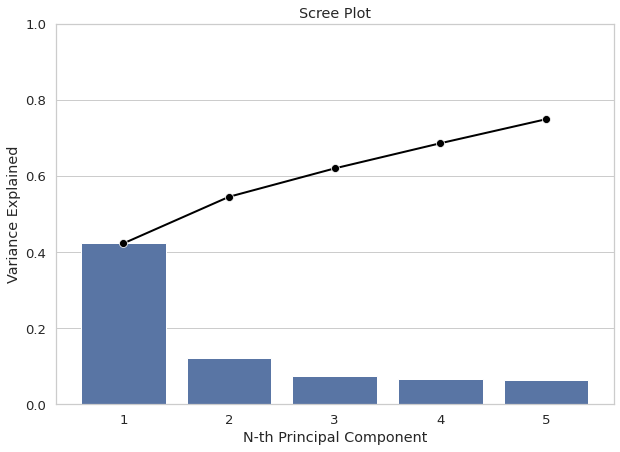

In [257]:
PC_components = np.arange(pca.n_components_) + 1

scree = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

scree = sns.barplot(x = PC_components, y = pca.explained_variance_ratio_, color = 'b')

scree = sns.lineplot(x = PC_components-1, 
                     y = np.cumsum(pca.explained_variance_ratio_), 
                     color = 'black', 
                     linestyle = '-', 
                     linewidth = 2, 
                     marker = 'o', 
                     markersize = 8
                    )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [258]:
pca.components_

array([[ 0.16550688,  0.03278881,  0.3724459 ,  0.38325277,  0.38826446,
         0.39155712,  0.38850525,  0.38067178,  0.13511986,  0.11676762,
         0.12805586,  0.11690304,  0.11374142,  0.10548142],
       [ 0.30070882,  0.0719059 , -0.1907932 , -0.17464355, -0.12688284,
        -0.12040254, -0.10592812, -0.09415709,  0.38319371,  0.40839052,
         0.39233873,  0.34961263,  0.30392284,  0.32352895],
       [-0.37857506, -0.86947069, -0.03420701, -0.00181402,  0.03474709,
         0.03407335,  0.03388178,  0.01848906,  0.17384521,  0.20092536,
         0.12206489,  0.06227199, -0.06090014, -0.05089629],
       [-0.20010308,  0.33898978, -0.06389889,  0.00762859,  0.06052779,
         0.07477433,  0.03955285, -0.07061633,  0.36205486,  0.3457454 ,
         0.24468791, -0.0947358 , -0.60983294, -0.36569202],
       [ 0.03531164, -0.03976   ,  0.04139074,  0.08316442,  0.11379024,
         0.02837754, -0.10675573, -0.16498587,  0.22565215,  0.14871442,
        -0.23959993, -0.57

In [259]:
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), 
                                columns=pcaSummary.columns,
                                index=df_transformed.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5
monto_credito,0.165507,0.300709,-0.378575,-0.200103,0.035312
edad,0.032789,0.071906,-0.869471,0.338990,-0.039760
amortizacion_sept_2005,0.372446,-0.190793,-0.034207,-0.063899,0.041391
amortizacion_agosto_2005,0.383253,-0.174644,-0.001814,0.007629,0.083164
amortizacion_julio_2005,0.388264,-0.126883,0.034747,0.060528,0.113790
amortizacion_junio_2005,0.391557,-0.120403,0.034073,0.074774,0.028378
amortizacion_mayo_2005,0.388505,-0.105928,0.033882,0.039553,-0.106756
amortizacion_abril_2005,0.380672,-0.094157,0.018489,-0.070616,-0.164986
pagoprev_sept_2005,0.135120,0.383194,0.173845,0.362055,0.225652
pagoprev_agosto_2005,0.116768,0.408391,0.200925,0.345745,0.148714


In [260]:
print("=============PC1=================")
print("** Más importante:")
print(pcsComponents_df.PC1.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC1.nsmallest(3))
print("=============PC2=================")
print("** Más importante:")
print(pcsComponents_df.PC2.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC2.nsmallest(3))
print("=============PC3=================")
print("** Más importante:")
print(pcsComponents_df.PC3.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC3.nsmallest(3))
print("=============PC4=================")
print("** Más importante:")
print(pcsComponents_df.PC4.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC4.nsmallest(3))
print("=============PC5=================")
print("** Más importante:")
print(pcsComponents_df.PC5.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC5.nsmallest(3))
#print("=============PC6=================")
#print("** Más importante:")
#print(pcsComponents_df.PC6.nlargest(3))
#print("** Menos importante:")
#print(pcsComponents_df.PC6.nsmallest(3))
##print("=============PC7=================")
#print("** Más importante:")
#print(pcsComponents_df.PC7.nlargest(3))
#print("** Menos importante:")
#print(pcsComponents_df.PC7.nsmallest(3))
#print("=============PC8=================")
#print("** Más importante:")
#print(pcsComponents_df.PC8.nlargest(3))
#print("** Menos importante:")
#print(pcsComponents_df.PC8.nsmallest(3))

=============PC1=================
** Más importante:
amortizacion_junio_2005    0.391557
amortizacion_mayo_2005     0.388505
amortizacion_julio_2005    0.388264
Name: PC1, dtype: float64
** Menos importante:
edad                   0.032789
pagoprev_abril_2005    0.105481
pagoprev_mayo_2005     0.113741
Name: PC1, dtype: float64
=============PC2=================
** Más importante:
pagoprev_agosto_2005    0.408391
pagoprev_julio_2005     0.392339
pagoprev_sept_2005      0.383194
Name: PC2, dtype: float64
** Menos importante:
amortizacion_sept_2005     -0.190793
amortizacion_agosto_2005   -0.174644
amortizacion_julio_2005    -0.126883
Name: PC2, dtype: float64
=============PC3=================
** Más importante:
pagoprev_agosto_2005    0.200925
pagoprev_sept_2005      0.173845
pagoprev_julio_2005     0.122065
Name: PC3, dtype: float64
** Menos importante:
edad                 -0.869471
monto_credito        -0.378575
pagoprev_mayo_2005   -0.060900
Name: PC3, dtype: float64
=============PC4

##**8).-Elabora los histogramas de los atributos para visualizar su distribución**##

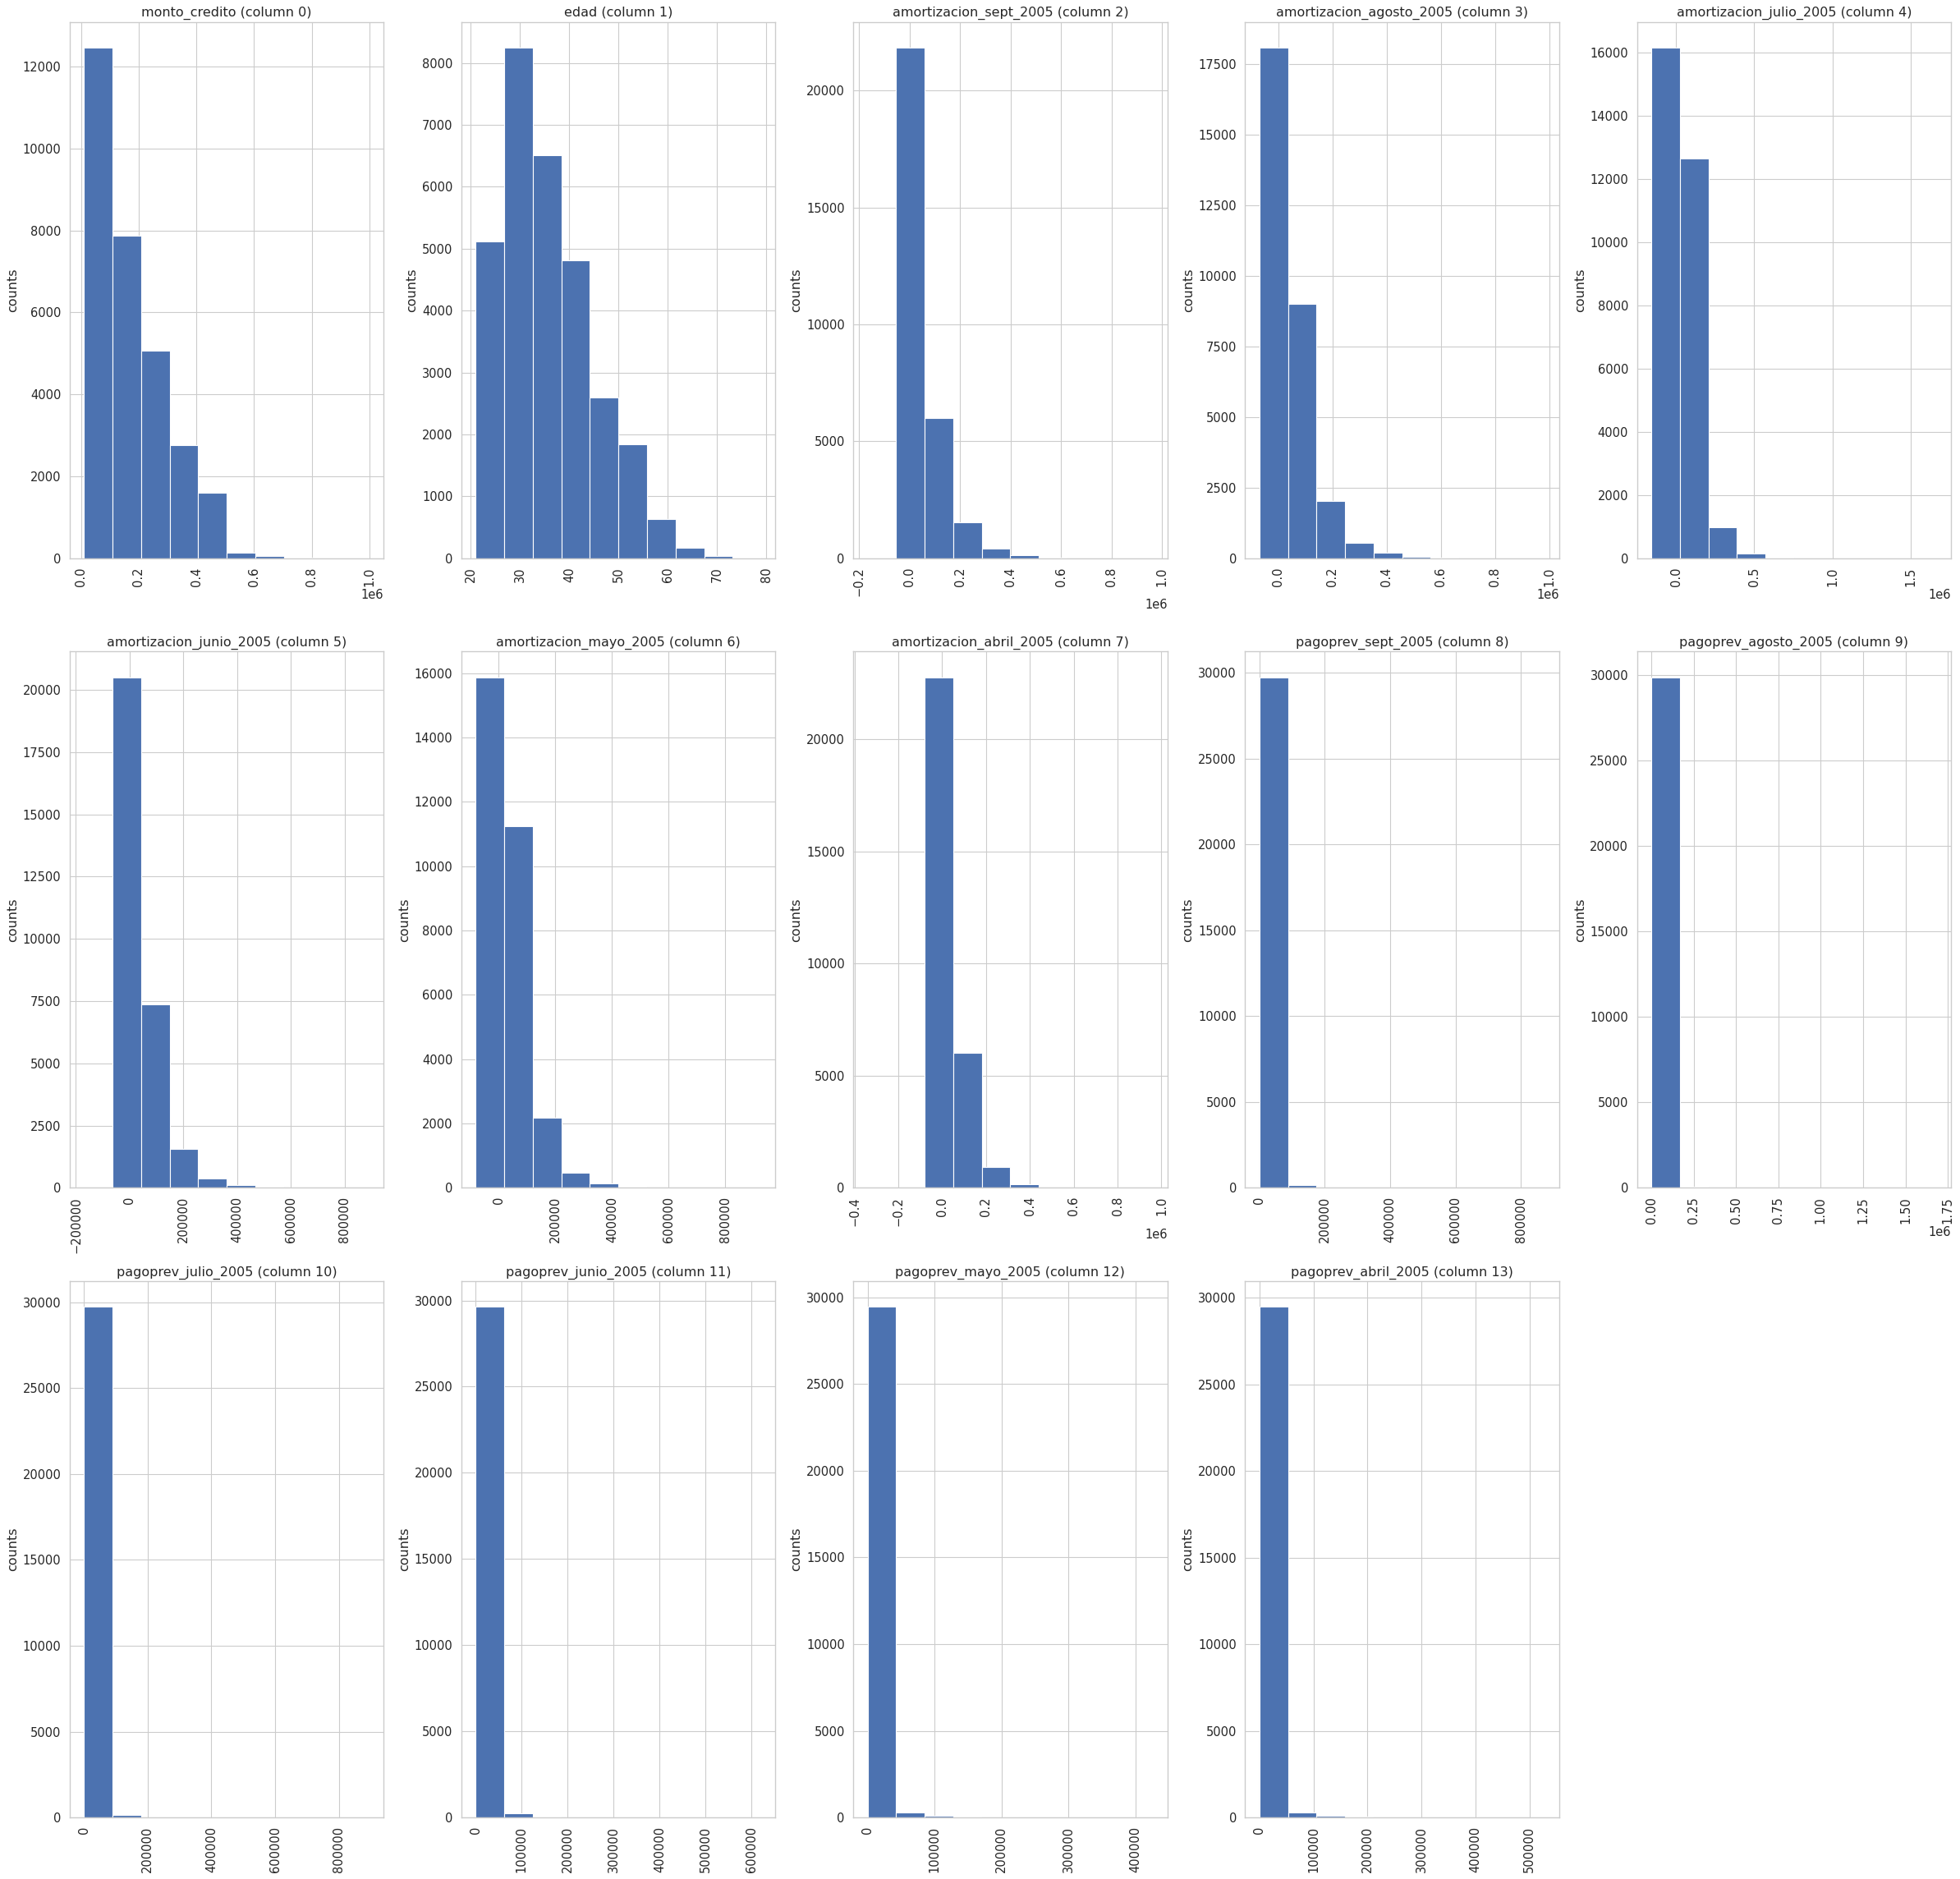

In [261]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os 

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 15, 5)

##**9).-Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**##

In [262]:
df.columns

Index(['monto_credito', 'edad', 'amortizacion_sept_2005',
       'amortizacion_agosto_2005', 'amortizacion_julio_2005',
       'amortizacion_junio_2005', 'amortizacion_mayo_2005',
       'amortizacion_abril_2005', 'pagoprev_sept_2005', 'pagoprev_agosto_2005',
       'pagoprev_julio_2005', 'pagoprev_junio_2005', 'pagoprev_mayo_2005',
       'pagoprev_abril_2005'],
      dtype='object')

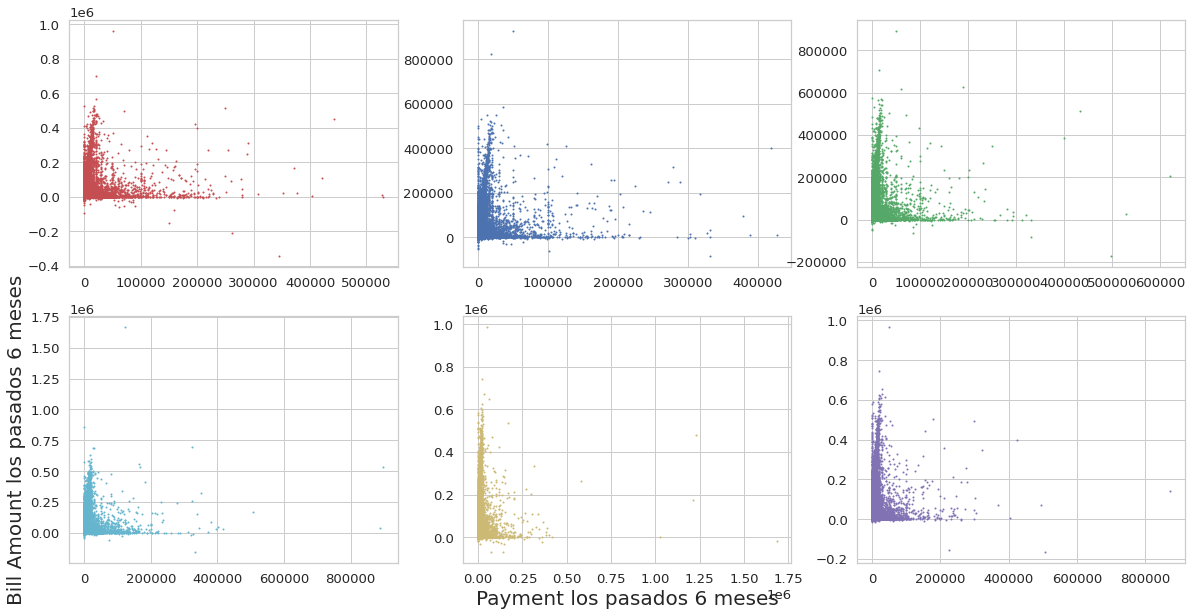

In [263]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df["pagoprev_abril_2005"], y=df["amortizacion_abril_2005"], c='r', s=1)

plt.subplot(232)
plt.scatter(x=df["pagoprev_mayo_2005"], y=df["amortizacion_mayo_2005"], c='b', s=1)

plt.subplot(233)
plt.scatter(x=df["pagoprev_junio_2005"], y=df["amortizacion_junio_2005"], c='g', s=1)

plt.subplot(234)
plt.scatter(x=df["pagoprev_julio_2005"], y=df["amortizacion_julio_2005"], c='c', s=1)

plt.ylabel("Bill Amount los pasados 6 meses", fontsize=20)

plt.subplot(235)
plt.scatter(x=df["pagoprev_agosto_2005"], y=df["amortizacion_agosto_2005"], c='y', s=1)

plt.xlabel("Payment los pasados 6 meses", fontsize=20)

plt.subplot(236)
plt.scatter(x=df["pagoprev_sept_2005"], y=df["amortizacion_sept_2005"], c='m', s=1)

plt.show()

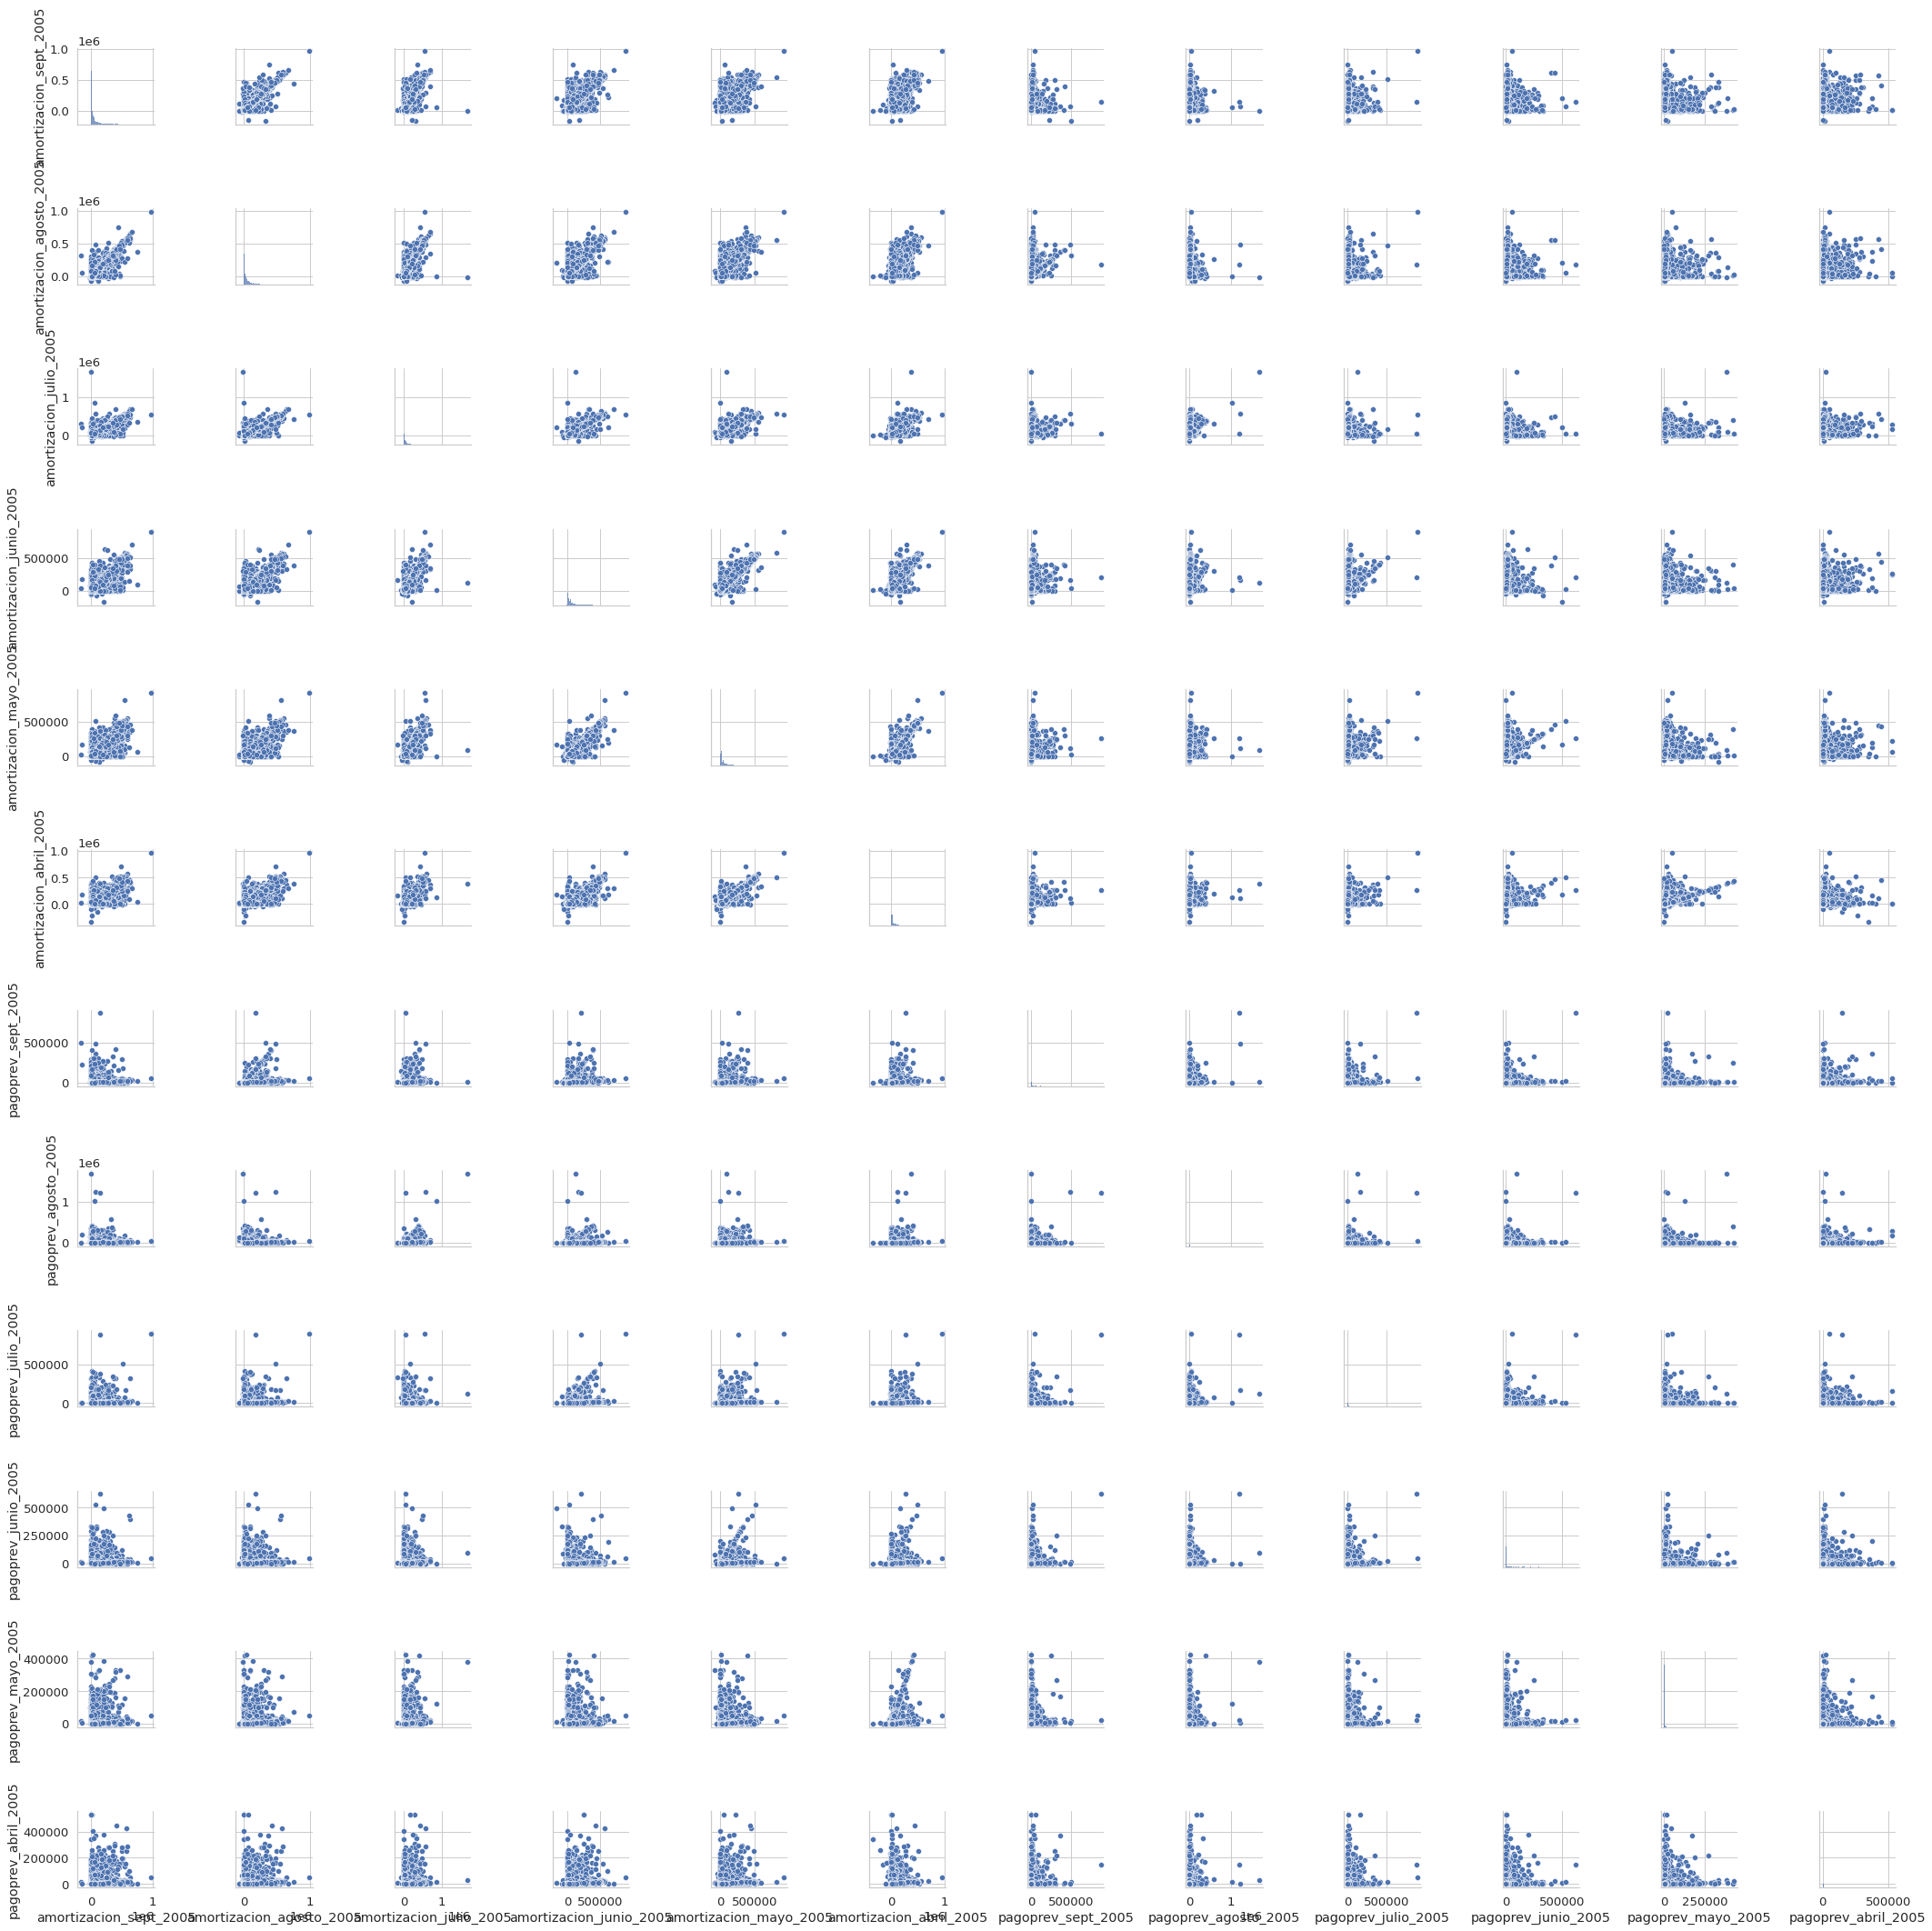

In [264]:
sns.pairplot(df[['amortizacion_sept_2005',
       'amortizacion_agosto_2005', 'amortizacion_julio_2005',
       'amortizacion_junio_2005', 'amortizacion_mayo_2005',
       'amortizacion_abril_2005', 'pagoprev_sept_2005', 'pagoprev_agosto_2005',
       'pagoprev_julio_2005', 'pagoprev_junio_2005', 'pagoprev_mayo_2005',
       'pagoprev_abril_2005']])

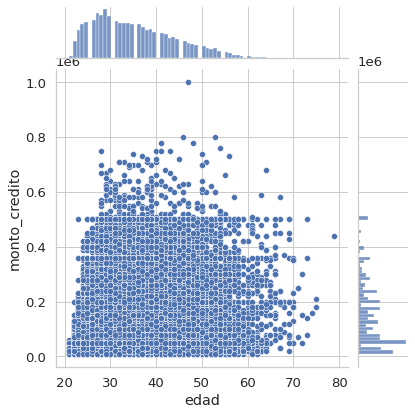

In [271]:
sns.jointplot(x = "edad", y = "monto_credito", kind = "scatter", data = df)
plt.show()

##**10).-Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**##

La gráfica de scatter aplicada a los valores de payment a lo largo de los meses y a amortización nos permite ver la correlación entre cada uno de los campos donde se puede inetrpretar que a menor monto mayor la posibilidad de pago

La gráfica pairplot se basa en dos figuras básicas, el histograma y el diagrama de dispersión. El histograma en la diagonal nos permite ver la distribución de una sola variable, mientras que los diagramas de dispersión en los triángulos superior e inferior muestran la relación (o la falta de ella) entre dos variables. El gráfico de pairplot por sí mismo a menudo nos brinda información valiosa. Vemos que correlación entre variables que indican el pago y el tipo de deuda

Finalmente mostramos el joinplot aplicado a edad y monto de credito, puede imprimir una gráfica de dos variables con gráficos bivariados y univariados. COncluimos que a menor edad es mayor la cantidad de crédito solicitado, lo cual concuerda que un cliente joven tiene una mayor probabilidad de solicitar mayor monto